<a href="https://colab.research.google.com/github/ImRafex/Makine-Ogrenmesine-Giris-/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning - **Application**

# Principal Component Analysis (PCA)**kalın metin**

It is a method that uses simple matrix operations from linear algebra and statistics to calculate a projection of the original data into the same number or fewer dimensions.

Iris datasets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [1]:
#PCA
#import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [2]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
X = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

In [5]:
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [6]:
finalDf = pd.concat([principalDf, df[['target']]], axis=1)

In [7]:
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


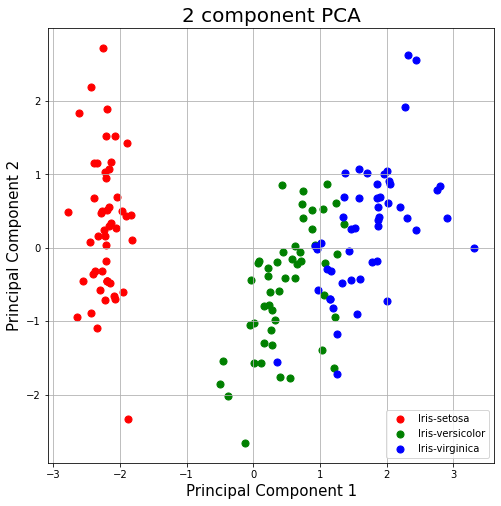

In [8]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], 
               finalDf.loc[indicesToKeep, 'principal component 2'], 
               c = color,
               s = 50)
    
ax.legend(targets)
ax.grid()

# **Dataset**

The dataset will have 1,000 examples, with two input features and one cluster per class. The clusters are visually obvious in two dimensions so that we can plot the data with a scatter plot and color the points in the plot by the assigned cluster. This will help to see, at least on the test problem, how “well” the clusters were identified.

Running the example creates the synthetic clustering dataset, then creates a scatter plot of the input data with points colored by class label (idealized clusters).

We can clearly see two distinct groups of data in two dimensions and the hope would be that an automatic clustering algorithm can detect these groupings.

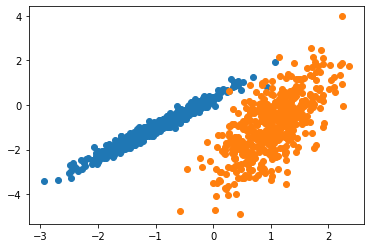

In [9]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
 
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
 
# show the plot
pyplot.show()

# **Affinity Propagation**

Affinity Propagation involves finding a set of exemplars that best summarize the data.

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_affinity_propagation.py:253: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_affinity_propagation.py:532: ConvergenceWarning: This model does not have any cluster centers because affinity propagation did not converge. Labeling every sample as '-1'.
  ConvergenceWarning,


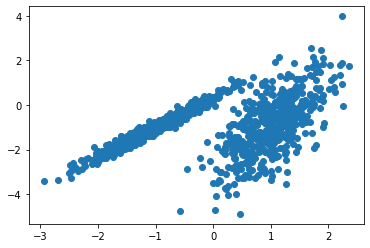

In [10]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# define the model
model = AffinityPropagation()

# fit the model
model.fit(X)

# assign a cluster to each example
yhat = model.predict(X)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
 
# show the plot
pyplot.show()

In [11]:
clusters

array([-1])

# **Hierarchical Clustering**

Agglomerative clustering involves merging examples until the desired number of clusters is achieved. It is a part of a broader class of hierarchical clustering methods.

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, a reasonable grouping is found.

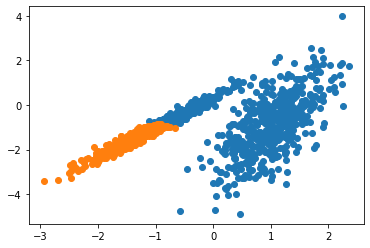

In [12]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
import numpy as np

# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# define the model
model = AgglomerativeClustering(n_clusters=2)

# fit model and predict clusters
yhat = model.fit_predict(X)

# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster

for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
 
# show the plot
pyplot.show()

In [13]:
clusters

array([0, 1])

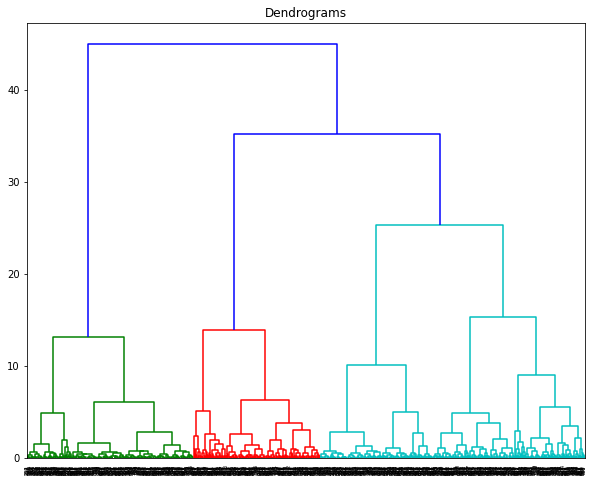

In [14]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

# **DBSCAN**

DBSCAN Clustering involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

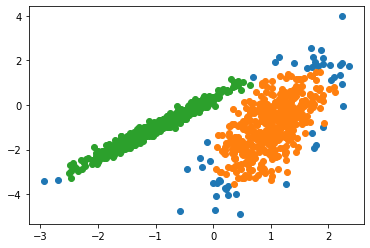

In [15]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot

# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# define the model
model = DBSCAN(eps=0.30, min_samples=9)

# fit model and predict clusters
yhat = model.fit_predict(X)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
 
# show the plot
pyplot.show()

# **K-Means**

K-Means Clustering may be the most widely known clustering algorithm and involves assigning examples to clusters in an effort to minimize the variance within each cluster.

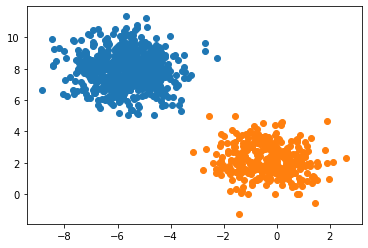

In [16]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

# define dataset
X, y = make_blobs(n_samples=1000, random_state=5)

# define the model
model = KMeans(n_clusters=2)

# fit the model
model.fit(X)

# assign a cluster to each example
yhat = model.predict(X)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
 
# show the plot
pyplot.show()

# **Elbow Method for K-Means Clustering**

In [17]:
# Create a list includes inertia for different k values
# inertia: Sum of squared distances of samples to their closest cluster center.
var = []
for k in range(1, 10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    
    print(f"{k}:{model.inertia_}")
    var.append(model.inertia_)

1:15792.758057460507
2:2153.103084237862
3:1610.7367542483416
4:1330.4564540158976
5:1093.0626991712497
6:940.9633311910272
7:787.7690492935874
8:700.404461530522
9:639.6722944971907


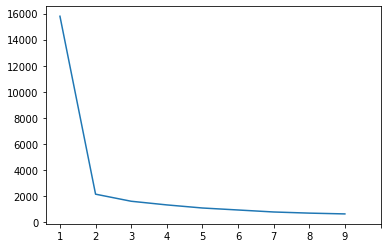

In [18]:
plt.plot(var)
plt.xticks(range(10), range(1, 10))
plt.show()

2:2153.103084237862
3:1610.7367542483416
4:1329.6746335085181
5:1094.515771777309
6:940.3108702626218
7:787.8254089910752
8:700.6839284917664
9:640.1140888466316
10:575.1366650782312


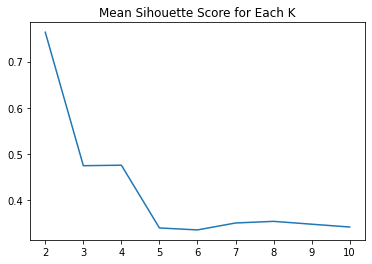

In [19]:
#Silhouette Score
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette = []

for k in range(2, 11):
    model = KMeans(n_clusters=k)
    model.fit(X)
    label=model.predict(X)

    print(f"{k}:{model.inertia_}")
    silhouette.append(silhouette_score(X, label))
    
ax = plt.plot(silhouette)
plt.xticks(range(9), range(2, 11))
plt.title("Mean Sihouette Score for Each K")
plt.show()

In [20]:
print(silhouette)

[0.7637501248824675, 0.4743493744056403, 0.4754016082525461, 0.3392959784343761, 0.3350629652424319, 0.3500953460102427, 0.35364516737348567, 0.34745827138011454, 0.341343519858296]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


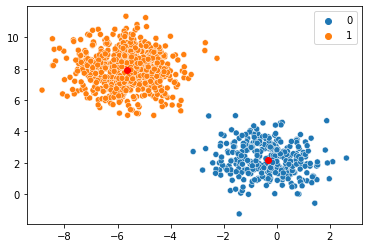

In [21]:
# Final run
import seaborn as sns

model = KMeans(n_clusters=2, random_state=5)
model.fit(X)

clusters = model.predict(X)

sns.scatterplot(X.T[0], X.T[1], hue=clusters);
plt.scatter(x=model.cluster_centers_[0][0], 
            y=model.cluster_centers_[0][1], 
            color='r');
            
plt.scatter(x=model.cluster_centers_[1][0], 
            y=model.cluster_centers_[1][1], 
            color='r');

# **Mini-Batch K-Means**

Mini-Batch K-Means is a modified version of k-means that makes updates to the cluster centroids using mini-batches of samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more robust to statistical noise.

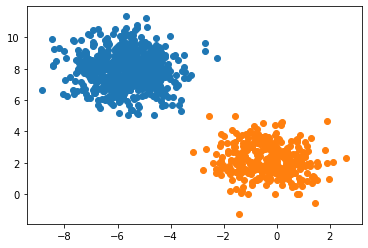

In [22]:
# mini-batch k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot
from sklearn.datasets import make_blobs

# define dataset
X, _ = make_blobs(n_samples=1000, random_state=5)

# define the model
model = MiniBatchKMeans(n_clusters=2,  batch_size=100)

# fit the model
model.fit(X)

# assign a cluster to each example
yhat = model.predict(X)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
 
# show the plot
pyplot.show()